In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df_test = pd.read_csv(r"C:\Users\sbanu\OneDrive\Desktop\codesoft\dataset\Genre Classification Dataset\test_data.txt", sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv(r"C:\Users\sbanu\OneDrive\Desktop\codesoft\dataset\Genre Classification Dataset\train_data.txt", sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN','movie_name','category','confession']
df_test.columns = ['SN','movie_name','confession']

In [3]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [4]:
df_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [5]:
df_train.describe()


,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [6]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   movie_name  54213 non-null  object
 2   category    54213 non-null  object
 3   confession  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\sbanu\AppData\Local\Temp\ipykernel_26544\1302100906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


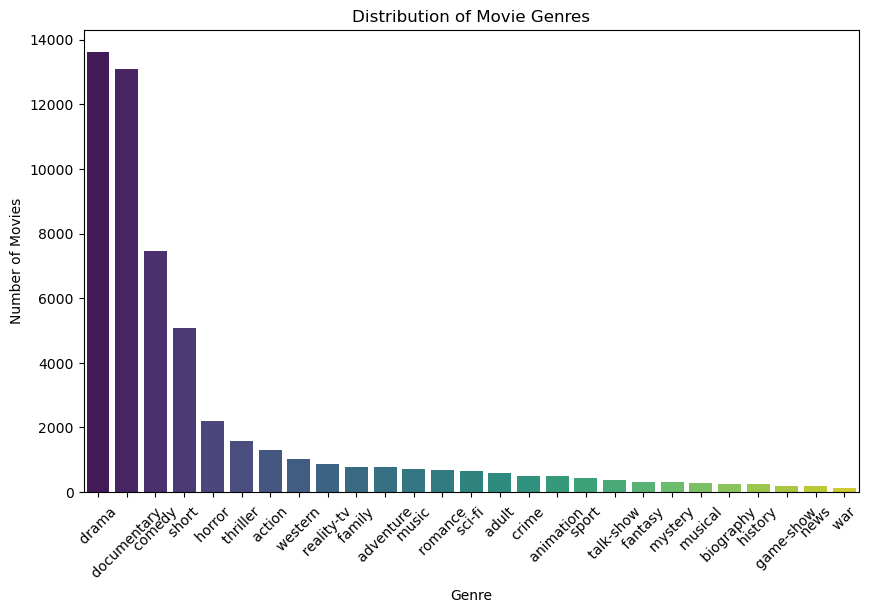

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of movies in each genre
genre_counts = df_train['category'].value_counts()

# Plot the distribution of movie genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Using 5000 most frequent words
X = vectorizer.fit_transform(df_train['confession'])
y = df_train['category']  # Genre (category) column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5082541731992991


In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.5915337083832888


C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))



C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes:
                precision    recall  f1-score   support

      action        0.50      0.03      0.06       259
       adult        0.67      0.02      0.03       115
   adventure        0.75      0.02      0.04       153
   animation        0.00      0.00      0.00       105
   biography        0.00      0.00      0.00        43
      comedy        0.52      0.41      0.45      1479
       crime        0.00      0.00      0.00       115
 documentary        0.56      0.89      0.69      2595
       drama        0.45      0.84      0.58      2727
      family        0.00      0.00      0.00       141
     fantasy        0.00      0.00      0.00        59
   game-show        1.00      0.04      0.08        47
     history        0.00      0.00      0.00        50
      horror        0.82      0.27      0.40       494
       music        1.00      0.06      0.12       158
     musical        0.00      0.00      0.00        51
     mystery        0.00      0.00      0.00      

C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression:
                precision    recall  f1-score   support

      action        0.48      0.27      0.35       259
       adult        0.62      0.20      0.30       115
   adventure        0.63      0.11      0.19       153
   animation        0.27      0.03      0.05       105
   biography        0.00      0.00      0.00        43
      comedy        0.54      0.61      0.57      1479
       crime        0.55      0.05      0.10       115
 documentary        0.66      0.87      0.75      2595
       drama        0.55      0.79      0.65      2727
      family        0.36      0.07      0.12       141
     fantasy        0.00      0.00      0.00        59
   game-show        0.92      0.51      0.66        47
     history        0.00      0.00      0.00        50
      horror        0.71      0.61      0.66       494
       music        0.67      0.37      0.48       158
     musical        0.00      0.00      0.00        51
     mystery        0.00      0.00      0.

C:\Users\sbanu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\sbanu\AppData\Local\Temp\ipykernel_26544\1746833453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='coolwarm')


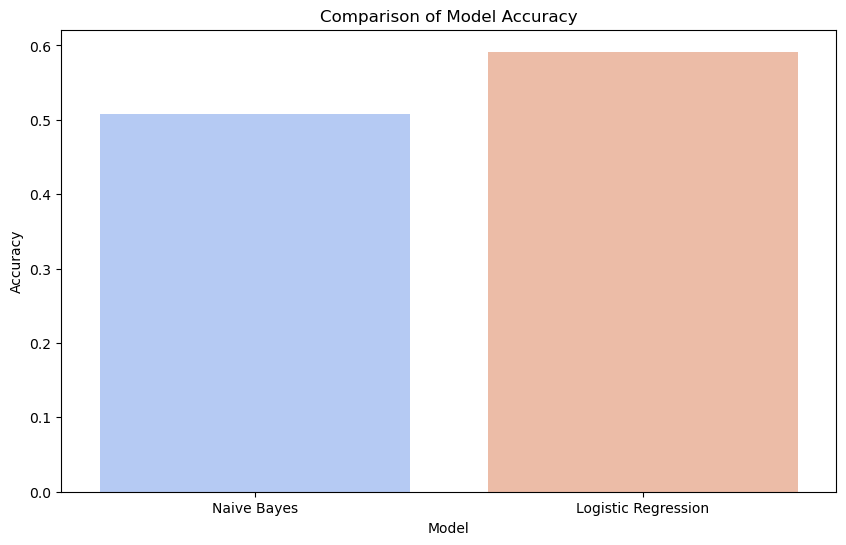

In [22]:
# Accuracy of each model
models = ['Naive Bayes', 'Logistic Regression']
accuracy = [
    accuracy_score(y_test, y_pred_nb), 
    accuracy_score(y_test, y_pred_lr)
]

# Plot the model accuracies
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy, palette='coolwarm')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
